## Datetime manipulation

When imported from files, dates are just string:

In [2]:
import pandas as pd
from datetime import datetime

In [3]:
google = pd.read_csv('stocks/GOOGL_2006-01-01_to_2018-01-01.csv')
google.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [4]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null object
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


However strings can be easily converted into datetime and set as index:

In [5]:
google.Date = pd.to_datetime(google.Date)
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null datetime64[ns]
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [6]:
google.set_index('Date', inplace=True)
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


The same result can be achieved just with parse_date argument of read_csv:

In [7]:
google = pd.read_csv('stocks/GOOGL_2006-01-01_to_2018-01-01.csv', 
                     index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


We can also plot the series:

In [8]:
google.Close.plot(title='GOOGL')

In [9]:
google = google[['Close','Volume']]
google.head()

,Close,Volume
Date,,
2006-01-03,217.83,13137450
2006-01-04,222.84,15292353
2006-01-05,225.85,10815661
2006-01-06,233.06,17759521
2006-01-09,233.68,12795837


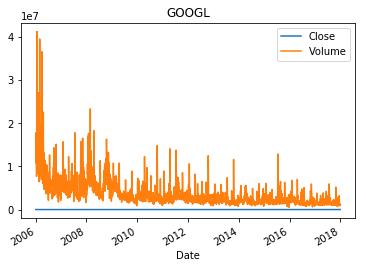

In [10]:
google.plot(title='GOOGL')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E7CFC9CC0>,
      dtype=object)

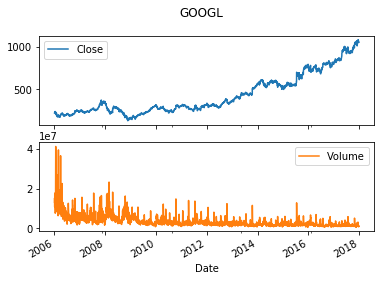

In [11]:
google.plot(title='GOOGL', subplots=True)

## Datetime selection

Datetime index allows to select and resample:

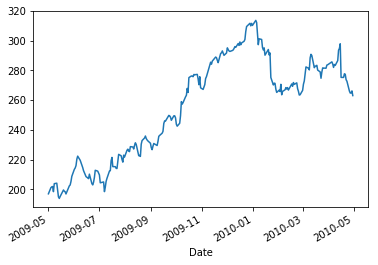

In [12]:
google['2009-5':'2010-4'].Close.plot()

In [13]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 2 columns):
Close     3019 non-null float64
Volume    3019 non-null int64
dtypes: float64(1), int64(1)
memory usage: 150.8 KB


## Datetime resampling

![](images/freq.png)

In [14]:
google_monthly = google.asfreq('M')
google_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2006-01-31 to 2017-11-30
Freq: M
Data columns (total 2 columns):
Close     102 non-null float64
Volume    102 non-null float64
dtypes: float64(2)
memory usage: 3.4 KB


In [15]:
google_monthly.head()

,Close,Volume
Date,,
2006-01-31,216.55,22449604.0
2006-02-28,181.49,39446833.0
2006-03-31,195.19,36514857.0
2006-04-30,NaN,NaN
2006-05-31,186.10,7982732.0


In [16]:
google_monthly = google.asfreq('MS')
google_monthly.tail()

,Close,Volume
Date,,
2017-08-01,946.56,1332456.0
2017-09-01,951.99,1042885.0
2017-10-01,NaN,NaN
2017-11-01,1042.60,2163073.0
2017-12-01,1025.07,1888081.0


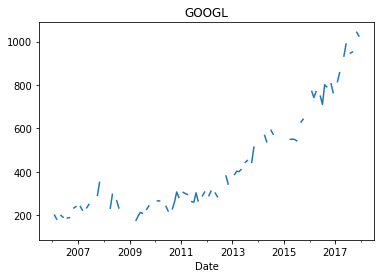

In [17]:
google_monthly.Close.plot(title='GOOGL')

We can fill missing data:

![](images/fill.png)

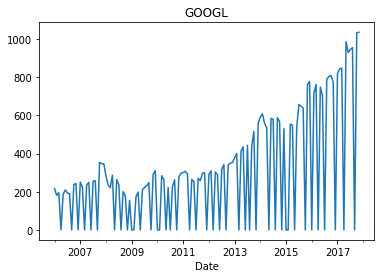

In [18]:
google_monthly = google.asfreq('M',fill_value=0)
google_monthly.Close.plot(title='GOOGL')

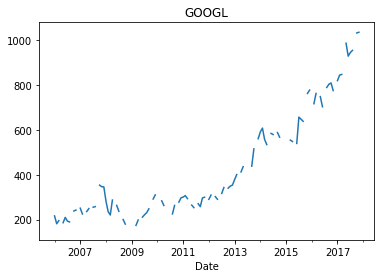

In [26]:
google_monthly = google.asfreq('M',how='ffill')
google_monthly.Close.plot(title='GOOGL')

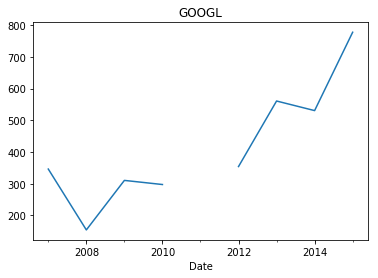

In [21]:
google_yearly = google.asfreq('Y',how='ffill')
google_yearly.Close.plot(title='GOOGL')

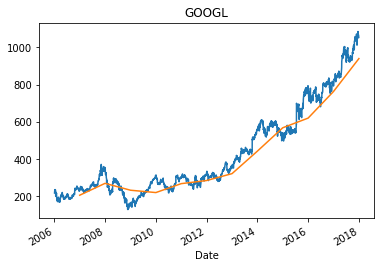

In [23]:
google_yearly = google.resample('Y').mean()
google.Close.plot()
google_yearly.Close.plot(title='GOOGL')

## Shift, diff, pct_change

In [21]:
google['Shifted'] = google.Close.shift() 
google[['Close','Shifted']].head()

,Close,Shifted
Date,,
2006-01-03,217.83,NaN
2006-01-04,222.84,217.83
2006-01-05,225.85,222.84
2006-01-06,233.06,225.85
2006-01-09,233.68,233.06


In [21]:
google['Shifted'] = google.Close.shift(periods=-2) #try also negative
google[['Close','Shifted']].head()

,Close,Shifted
Date,,
2006-01-03,217.83,225.85
2006-01-04,222.84,233.06
2006-01-05,225.85,233.68
2006-01-06,233.06,235.11
2006-01-09,233.68,236.05


In [25]:
google['Shifted'] = google.Close.asfreq('3D').shift()
google[['Close','Shifted']].head(20)

,Close,Shifted
Date,,
2006-01-03,217.83,NaN
2006-01-04,222.84,NaN
2006-01-05,225.85,NaN
2006-01-06,233.06,217.83
2006-01-09,233.68,233.06
2006-01-10,235.11,NaN
2006-01-11,236.05,NaN
2006-01-12,232.05,233.68
2006-01-13,233.36,NaN


In [23]:
google['Shifted'] = google.Close.shift()
google['Diff'] = google.Close - google.Shifted # x_t - x_{t-1}
google['Diff2'] = google.Close.diff()
google[['Close','Diff','Diff2']].head()

,Close,Diff,Diff2
Date,,,
2006-01-03,217.83,NaN,NaN
2006-01-04,222.84,5.01,5.01
2006-01-05,225.85,3.01,3.01
2006-01-06,233.06,7.21,7.21
2006-01-09,233.68,0.62,0.62


In [24]:
google['Pct_change']=google.Close.pct_change()
google[['Close','Diff','Pct_change']].head() # (x_t - x_{t-1})/x_t

,Close,Diff,Pct_change
Date,,,
2006-01-03,217.83,NaN,NaN
2006-01-04,222.84,5.01,0.023000
2006-01-05,225.85,3.01,0.013507
2006-01-06,233.06,7.21,0.031924
2006-01-09,233.68,0.62,0.002660


## Rolling Average 

In [27]:
humidity = pd.read_csv('weather/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [31]:
#Do some cleaning
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')


Vancouver            86.0
Portland             80.0
San Francisco        80.0
Seattle              81.0
Los Angeles          66.0
San Diego            71.0
Las Vegas            27.0
Phoenix              32.0
Albuquerque          41.0
Denver               52.0
San Antonio          71.0
Dallas               65.0
Houston              78.0
Kansas City          67.0
Minneapolis          72.0
Saint Louis          73.0
Chicago              76.0
Nashville            70.0
Indianapolis         74.0
Atlanta              73.0
Detroit              75.0
Jacksonville         79.0
Charlotte            73.0
Miami                76.0
Pittsburgh           72.0
Toronto              78.0
Philadelphia         68.0
New York             67.0
Montreal             74.0
Boston               81.0
Beersheba            76.0
Tel Aviv District    68.0
Eilat                48.0
Haifa                91.0
Nahariyya            89.0
Jerusalem            70.0
dtype: float64

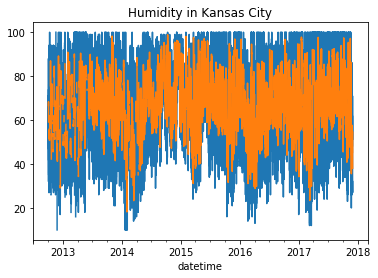

In [28]:
humidity["Kansas City"].plot(title='Humidity in Kansas City')
humidity["Kansas City"].rolling(window=30).mean().plot()
humidity.median

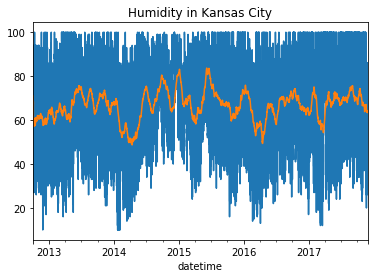

In [29]:
humidity["Kansas City"].plot(title='Humidity in Kansas City')
humidity["Kansas City"].rolling(window='30D').mean().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b12ceb8>,
      dtype=object)

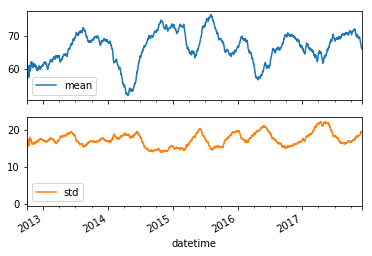

In [30]:
data = humidity["Kansas City"].rolling('90D').agg(['mean', 'std'])
data.plot(subplots=True)

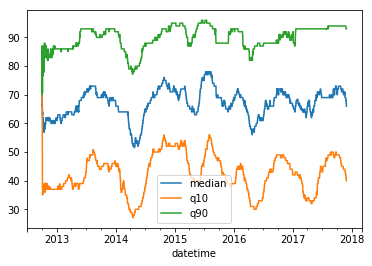

In [32]:
rolling = humidity["Kansas City"].rolling('90D')
data = rolling.median().to_frame('median')

data['q10'] = rolling.quantile(.1)
data['q90'] = rolling.quantile(.9)

data.plot()